<a href="https://colab.research.google.com/github/btramduong0810/dsc-mod-1-project-v2-1-online-ds-sp-000/blob/master/Data_Science_in_Action_The_Movie_Industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Submission

* Student name: **BAO TRAM DUONG**
* Student pace: **SELF-PACED DATA SCIENCE PROGRAM**
* Scheduled project review date/time: 
* Instructor name: **JEFF HERMAN**
* Blog post URL:


# **Part III: Table of Contents**

**1.  Introduction**

1.1  Business Statement

**2.  Data Visualization**

**Question 1:** Is there a correlation between production budget and profit? If so, how much should Microsoft invest into production to get the highest ROI?

        2.1  Budget vs. Worldwide Profit
        
             2.1a. Budget
             
                   2.1ai. General trend
                   2.1aii. Top 100 performers trend
                   
             2.1b. Profit
                    
                    2.1bi. Domestic Profit, International Profit, Worldwide Profit
                    2.1bii. Top 100 performers with respect to Worldwide Profit
                    
**Question 2:** What kind of movie contents, in term of genre, source, creative type, production method, perform the best?

        2.2  Genre vs. Worldwide Profit
        
             2.2a. General distribution vs. Top 100 distribution
             2.2b. Top 100 performers vs. Worldwide Profit
             2.2c. Top 100 performers with respect to Production Budget and Worldwide Profit
             
        2.3  Source vs. Worldwide Profit
        
             2.3a. General distribution vs. Top 100 distribution
             2.3b. Top 100 performers vs. Worldwide Profit
             2.3c. Top 100 performers with respect to Production Budget and Worldwide Profit

        2.4  Creative Type vs. Worldwide Profit
        
             2.4a. General distribution vs. Top 100 distribution
             2.4b. Top 100 performers vs. Worldwide Profit
             2.4c. Top 100 performers with respect to Production Budget and Worldwide Profit
             
        2.5  Production Method vs. Worldwide Profit
        
             2.5a. General distribution vs. Top 100 distribution
             2.5b. Top 100 performers vs. Worldwide Profit
             2.5c Top 100 performers with respect to Production Budget and Worldwide Profit
             
**Question 3:** Can popularity or words of mouth, in term of rating and number of votes, and the popularity of a studio affect the performance of a movie?

        2.6. Popularity vs. Worldwide Profit
            
            2.6a. General distribution vs. Top 100 distribution
            2.6b. Genres with respect to Popularity & Worldwide Profit
            2.6c. Sources with respect to Popularity & Worldwide Profit
            2.6d. Creative Types with respect to Popularity & Worldwide Profit
            2.6e. Production Method with respect to Popularity & Worldwide Profit
        
        2.7. Rating & number of votes vs. Worldwide Profit
            
            2.7a. General distribution vs. Top 100 distribution
            2.7b. Genres with respect to Average Rating & Worldwide Profit
            2.7c. Sources with respect to Average Rating & Worldwide Profit
            2.7d. Creative Types with respect to Average Rating & Worldwide Profit
            2.7e. Production Method with respect to Average Rating & Worldwide Profit                            


# **1. INTRODUCTION**

## **1.1 Business Statement**

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired a team of data scientist from Flatiron to help them better understand the movie industry. The team is charged with doing data analysis and creating a presentation that explores what type of films are currently doing the best at the box office. The team must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

What makes a movie succesful and how do we create the next blockbuster movie that can return the highest ROI possible?


# **2. DATA VISUALIZATION**

### **Methodology:**

        1. Using seaborn package and matplotlib to visualize data
        2. Get the general trend/ distribution of all movies using distribution plot and/or bar plot.
        3. Get distribution of Top 100 movies to see what is done differently to reach higher success using distribution plot and/or bar plot and/or scatter plot and/or line plot.
        4. Do analysis on the mean average using box plot.
        5. Do analysis each category using swarm plot.
        6. Compare all movies all at once using rel plot.

## Display the full dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_context("talk", rc={"lines.linewidth": 2})
sns.set_style('darkgrid')

/Users/baotramduong8/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#read data
full_df = pd.read_csv('full_df', index_col = 0)

#preview
full_df.head()

,movie,release_year,studio,language,popularity,runtime_minutes,average_rating,num_votes,release_date,genre,...,creative_type,production_budget,domestic_gross,international_gross,worldwide_gross,worldwide_profit,domestic_profit,international_profit,worldwide_profit_margin,budget_range
0,Avengers: Age of Ultron,2015,BV,en,44.383,141.0,7.3,665594,2015-05-01,Action,...,Super Hero,365000000,459005868,937093334,1396099202,1031099202,94005868,572093334,73.855726,>200M
1,Avengers: Infinity War,2018,BV,en,80.773,149.0,8.5,670926,2018-04-27,Action,...,Super Hero,300000000,678815482,1365725041,2044540523,1744540523,378815482,1065725041,85.326777,>200M
2,Justice League,2017,WB,en,34.953,120.0,6.5,329135,2017-11-17,Action,...,Super Hero,300000000,229024295,426920914,655945209,355945209,-70975705,126920914,54.264473,>200M
3,Spectre,2015,Sony,en,30.318,148.0,6.8,352504,2015-11-06,Action,...,Contemporary Fiction,300000000,200074175,679426585,879500760,579500760,-99925825,379426585,65.889740,>200M
4,The Dark Knight Rises,2012,WB,en,26.220,164.0,8.4,1387769,2012-07-20,Action,...,Super Hero,230000000,448139099,634089008,1082228107,852228107,218139099,404089008,78.747549,>200M


In [3]:
#list of attributes
full_df.columns

Index(['movie', 'release_year', 'studio', 'language', 'popularity',
       'runtime_minutes', 'average_rating', 'num_votes', 'release_date',
       'genre', 'source', 'production_method', 'creative_type',
       'production_budget', 'domestic_gross', 'international_gross',
       'worldwide_gross', 'worldwide_profit', 'domestic_profit',
       'international_profit', 'worldwide_profit_margin', 'budget_range'],
      dtype='object')

## Question 1: Is there a correlation between production budget and profit? If so, how much should Microsoft invest into production to get the highest ROI?

### Production Budget 

In [4]:
#production_budget distribution for all movies
y_values = full_df['production_budget'].sort_values(ascending=False)
x_values = y_values.index

#remove scientific notation
y_values.describe().apply(lambda x: format(x, 'f'))

count          629.000000
mean      68086486.486486
std       61577082.023022
min         100000.000000
25%       24000000.000000
50%       45000000.000000
75%       95000000.000000
max      365000000.000000
Name: production_budget, dtype: object

This is a huge range, it takes as low as $100,000 and as high as 365M to create a movie.

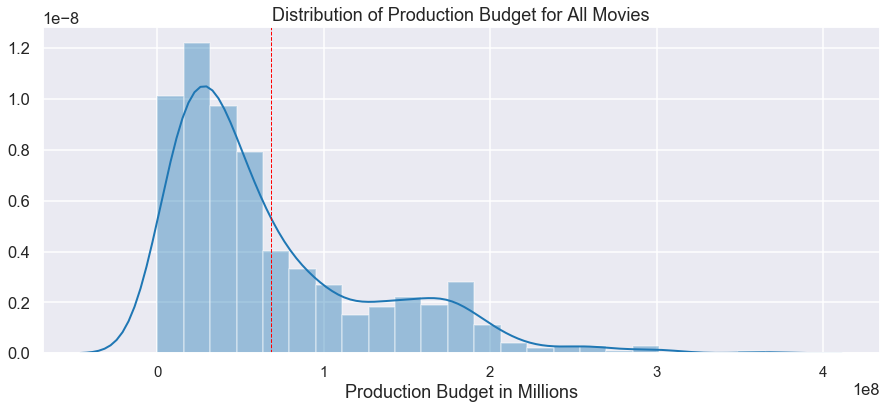

In [5]:
#plot production_budget for all movies
plt.figure(figsize = (15, 6))
sns.distplot(full_df['production_budget'], label = 'General')

#set labels
plt.title('Distribution of Production Budget for All Movies')
plt.xlabel('Production Budget in Millions')

#draw mean()
plt.axvline(full_df['production_budget'].mean(),
           ls = '--', lw = 1, color = 'r')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [6]:
#save
plt.savefig('production_budget_distribution_distplot')

<Figure size 432x288 with 0 Axes>

Production budget is heavily skewed. With most of the movies budgets fall in the <50M range.  

Let's obtain a list of top 100 investment so we can later compare this list with top 100 performers and see if they match.

In [7]:
#list of top 100 investments
top_100_budget = full_df[['movie', 
                          'production_budget']].sort_values(by = 'production_budget', 
                                                            ascending = False)[:100]
top_100_budget.head(20)

,movie,production_budget
0,Avengers: Age of Ultron,365000000
3,Spectre,300000000
1,Avengers: Infinity War,300000000
2,Justice League,300000000
5,Solo: A Star Wars Story,275000000
6,John Carter,263700000
9,Batman v Superman: Dawn of Justice,263000000
7,Tangled,260000000
8,Captain America: Civil War,250000000
11,The Hobbit: The Desolation of Smaug,250000000


### Profit

Let's take a look at profits generated domestically, internationally, and worldwide.

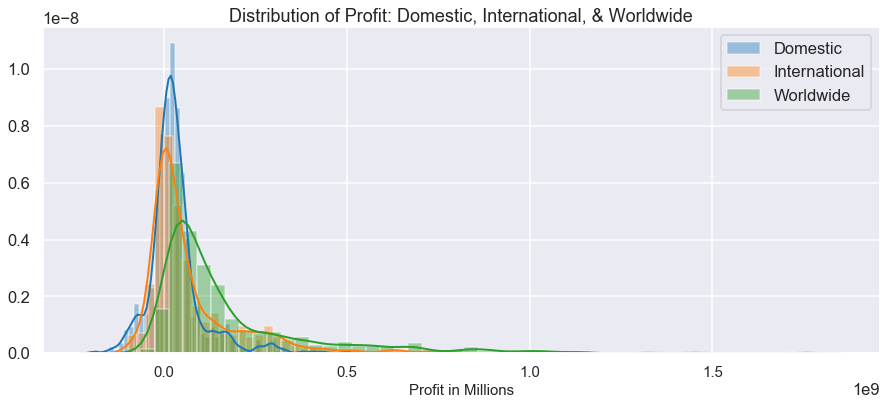

In [8]:
#plot distibution of profit
plt.figure(figsize = (15, 6))

#domestic profit
ax1 = sns.distplot(full_df['domestic_profit'], label = 'Domestic')

#international profit
ax2 = sns.distplot(full_df['international_profit'], label = 'International')

#worldwide profit
ax3 = sns.distplot(full_df['worldwide_profit'], label = 'Worldwide')

#set labels
plt.legend()
plt.title('Distribution of Profit: Domestic, International, & Worldwide')
plt.xlabel('Profit in Millions', fontsize = 15)

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [9]:
#save
plt.savefig('profit_distribution_distplot')

<Figure size 432x288 with 0 Axes>

We are interested in worldwide_profit as this reflect the total profit earned. If we have more time, we can analyze each of the attribute with profit generated domestically vs. internationally to see if a movie performs better domestically than internationally and vice versa and why that is.

<Figure size 1080x360 with 0 Axes>

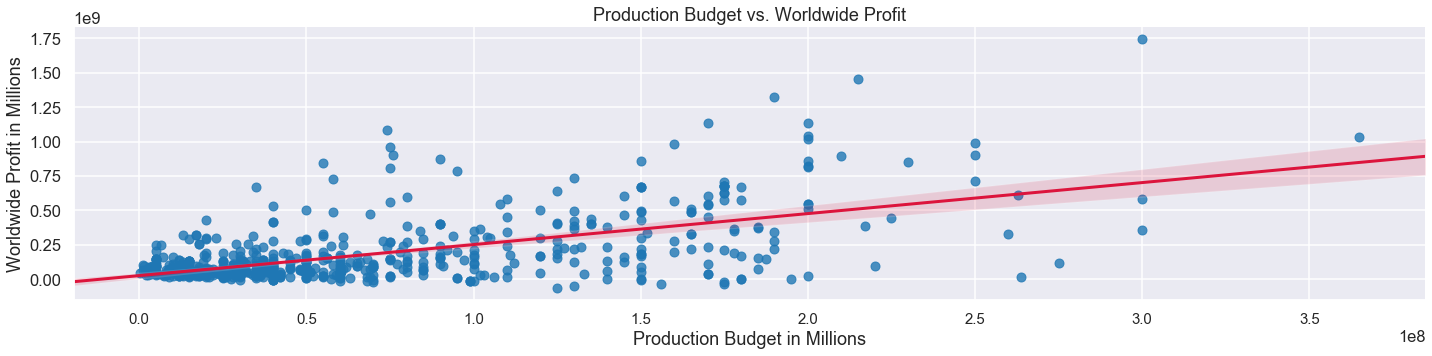

In [10]:
#plot 'production_budget' vs. worldwide_profit'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'production_budget',
           y = 'worldwide_profit',
           data = full_df, 
           aspect = 4, line_kws={'color': 'crimson'})

#set labels
plt.title('Production Budget vs. Worldwide Profit')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [11]:
#save
plt.savefig('budget_vs_profit_lmplot')

<Figure size 432x288 with 0 Axes>

Looking at this regression line, we see that there is a correlation between productin budget and worldwide profit. Now we need to look further into at which minimum budget investment is required to really set our movie apart from the our competitors.

In [12]:
#list of top 100 performers
top_100_profit = full_df[['movie', 'worldwide_profit', 
                          'domestic_profit', 'international_profit']].sort_values(by = 'worldwide_profit', 
                                                                                  ascending = False)[:100]
top_100_profit.head(20)

,movie,worldwide_profit,domestic_profit,international_profit
1,Avengers: Infinity War,1744540523,378815482,1065725041
16,Jurassic World,1454943967,437270625,802673342
31,Furious 7,1327179709,163007020,974172689
59,Jurassic World: Fallen Kingdom,1138334005,247719760,720614245
21,Black Panther,1136498912,500059566,436439346
207,Minions,1085631140,262045770,749585370
22,Incredibles 2,1042805359,408581744,434223615
0,Avengers: Age of Ultron,1031099202,94005868,572093334
25,Iron Man 3,1015392272,208992272,606400000
12,The Fate of the Furious,986703796,-24235235,760939031


Comparing top_10_budget movies and top_100_profit movies, they are not the same list. For the first 20 movies, only 8 out of 20 top_budget movies made it into top_profit list. So higher investment into production does not necessarily always mean higher profit. 

### Production Budget vs. Worldwide Profit

Let's look at how the top 100 performers do differently than the rest.

In [13]:
#create sub dataframe for production_budget and worldwide_profit of top 100 performers
budget_vs_100_profit = full_df[['production_budget', 
                                'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                 ascending = False)[:100]
budget_vs_100_profit.head()

,production_budget,worldwide_profit
1,300000000,1744540523
16,215000000,1454943967
31,190000000,1327179709
59,170000000,1138334005
21,200000000,1136498912


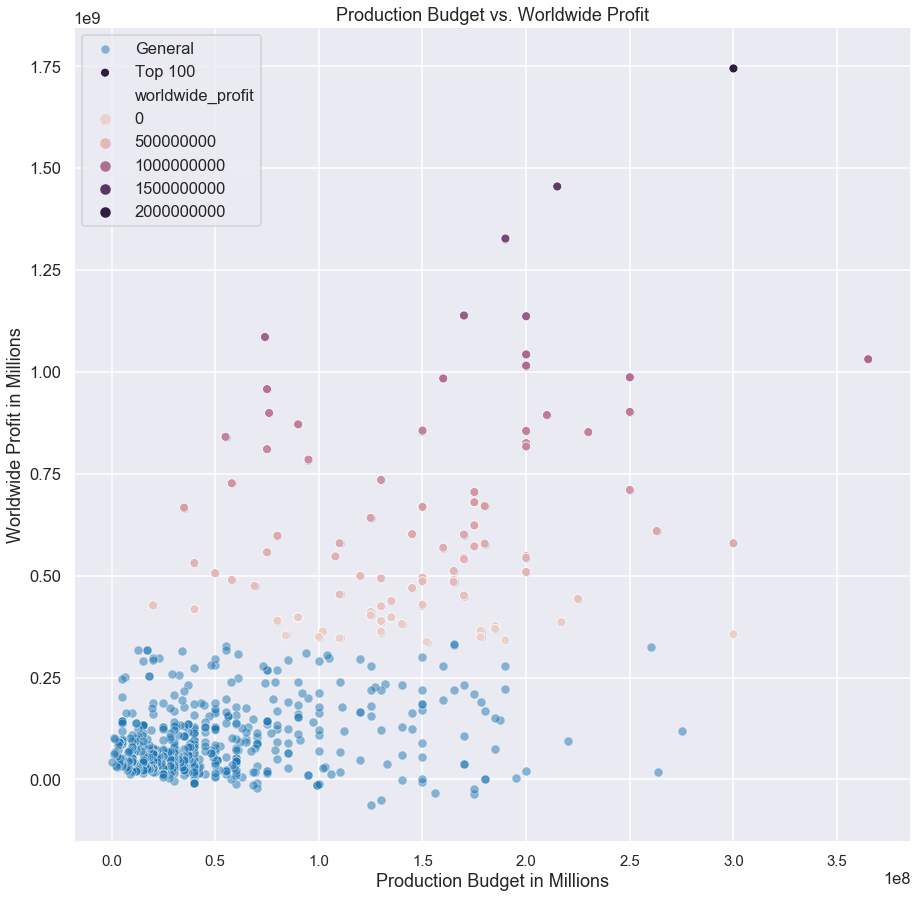

In [14]:
#plot 'production_budget' vs. 'worldwide_profit' for general trend and top 100 performers trend
plt.figure(figsize = (15, 15))

#general
sns.scatterplot(x = full_df['production_budget'], 
                      y = full_df['worldwide_profit'],
                      label = 'General', alpha = 0.5)
#top 100
sns.scatterplot(x = budget_vs_100_profit['production_budget'], 
                      y = budget_vs_100_profit['worldwide_profit'],
                      hue = budget_vs_100_profit['worldwide_profit'],
                      label = 'Top 100')

#set labels
plt.legend(loc='upper left')
plt.title('Production Budget vs. Worldwide Profit')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [15]:
#save
plt.savefig('budget_vs_profit_scatterplot')

<Figure size 432x288 with 0 Axes>

In [16]:
#compare production_budget between general trend and top 100 sucessful trend
print('The average production budget in general is', 
      full_df['production_budget'].mean(), 'million dollars.')
print('The average production budget in top 100 performers is', 
      budget_vs_100_profit['production_budget'].mean(), 'million dollars.')

The average production budget in general is 68086486.48648648 million dollars.
The average production budget in top 100 performers is 150670000.0 million dollars.


In [17]:
#compare worldwide_profit between general trend and top 100 sucessful trend
print('The average worldwide_profit in general is', 
      full_df['worldwide_profit'].mean(), 'million dollars.')
print('The average worldwide_profit in top 100 performers is', 
      budget_vs_100_profit['worldwide_profit'].mean(), 'million dollars.')

The average worldwide_profit in general is 179064870.3799682 million dollars.
The average worldwide_profit in top 100 performers is 624684416.28 million dollars.


This plot tells us the same thing as above, higher investment does not always guarantee higher profit and many of the lower budget movies found success regardless of the initial investment. 
It is likely that the minimum budget requirement to create a movie is $150M, which is the mean average of top 100 performers' production budget. Let's investigate.

### Production Budget Range vs. Profit

In [18]:
#create sub dataframe for budget_range and worldwide_profit of top 100 performers
budget_range_vs_100_profit = full_df[['budget_range',
                                      'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                       ascending = False)[:100]
budget_range_vs_100_profit.head()

,budget_range,worldwide_profit
1,>200M,1744540523
16,>200M,1454943967
31,150-200M,1327179709
59,150-200M,1138334005
21,150-200M,1136498912


In [19]:
#check bins
budget_range_vs_100_profit['budget_range'].value_counts()

150-200M    36
100-150M    27
50-100M     18
>200M       13
<50M         6
Name: budget_range, dtype: int64

We can again see here the majority of top 100 performers invested within the $150-200M range. Let's create a visual plot for this:

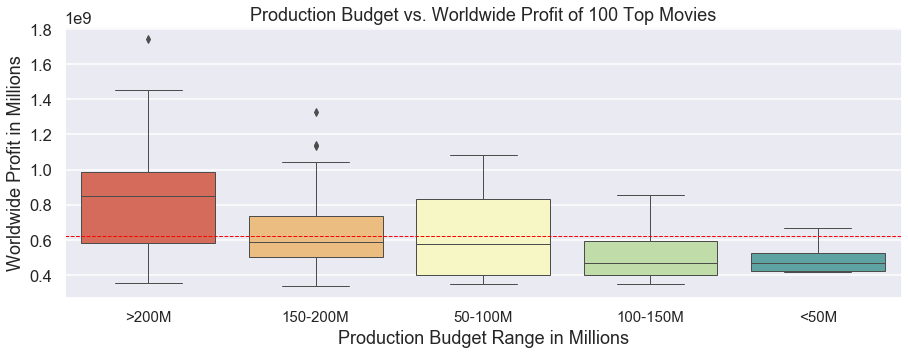

In [20]:
#set values
x_values = budget_range_vs_100_profit['budget_range']
y_values = budget_range_vs_100_profit['worldwide_profit']

#plot budget_range vs. worldwide_profit of the top 100 performers
plt.figure(figsize = (15, 5))
sns.boxplot(x_values, y_values, 
            linewidth = 1, palette = 'Spectral')

#draw mean()
plt.axhline(budget_range_vs_100_profit['worldwide_profit'].mean(), 
            ls = '--', lw = 1, color = 'r', label = 'mean avg')

#set labels
plt.title('Production Budget vs. Worldwide Profit of 100 Top Movies')
plt.xlabel('Production Budget Range in Millions')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [21]:
#save 
plt.savefig('budget_range_vs_100_profit_boxplot')

<Figure size 432x288 with 0 Axes>

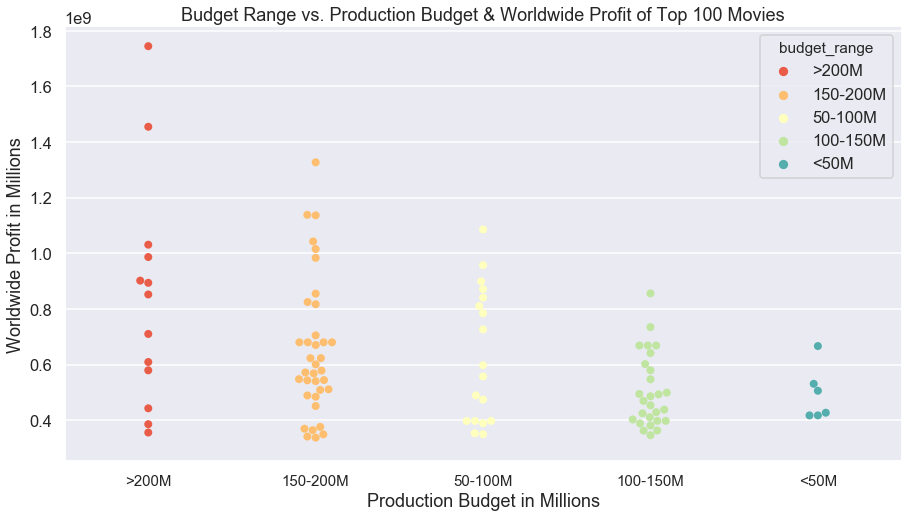

In [22]:
#plot all budget_range with respect to 'production_budget' and 'worldwide_gross'
plt.figure(figsize = (15, 8))
sns.swarmplot(x = 'budget_range',
            y = 'worldwide_profit',
            hue = 'budget_range',
            data = budget_range_vs_100_profit,
            s = 8, palette = 'Spectral')

#set labels
plt.title('Budget Range vs. Production Budget & Worldwide Profit of Top 100 Movies')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [23]:
#save
plt.savefig('production_budget_vs_100_profit_swarmplot')

<Figure size 432x288 with 0 Axes>

Based on production budget alone, we recommend that our production budget for our future movie to be at least $150M.

## Question 2: What kind of movie contents, in term of genre, source, creative type, production method, perform the best?

### Genre

In [24]:
#genre_distribution values of all movies
y_values = full_df['genre'].value_counts(ascending=False)
x_values = y_values.index

y_values

Adventure              129
Comedy                 107
Action                 104
Drama                   96
Thriller/Suspense       80
Horror                  58
Romantic Comedy         22
Musical                 13
Black Comedy            12
Western                  5
Concert/Performance      3
Name: genre, dtype: int64

We can see here the movie industry is very Adventure-oriented as the majority of the movies made from 2010-2018 are in the Adventure genre. 

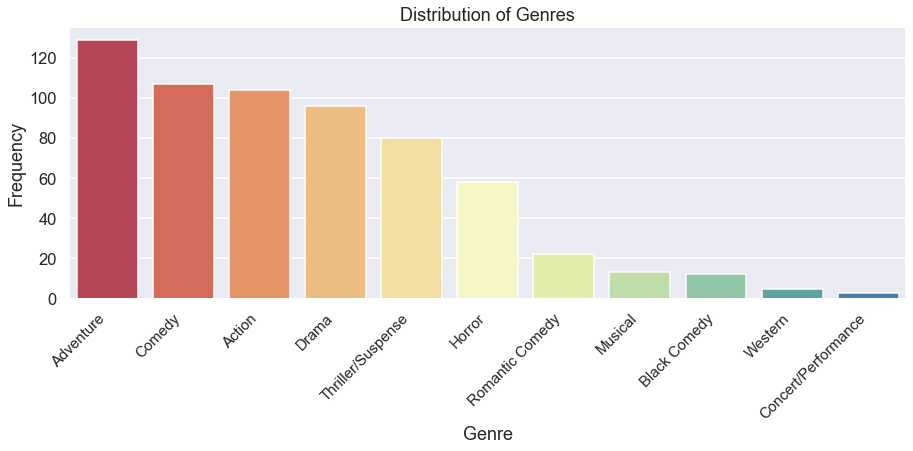

In [25]:
#plot genres distribution of the general dataset
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, palette = 'Spectral')

#set labels
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [26]:
#save
plt.savefig("genre_distribution_barplot")

<Figure size 432x288 with 0 Axes>

We see that Adventure, Comedy and Action are the most popular genres overall. Do the top 100 performers also follow this distribution?

In [27]:
#create sub dataframe 'genre' vs. 'worldwide_profit' of top 100 performers
genre_vs_100_profit = full_df[['genre', 'production_budget',
                               'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                ascending = False)[:100]
genre_vs_100_profit.head()

,genre,production_budget,worldwide_profit
1,Action,300000000,1744540523
16,Action,215000000,1454943967
31,Action,190000000,1327179709
59,Action,170000000,1138334005
21,Action,200000000,1136498912


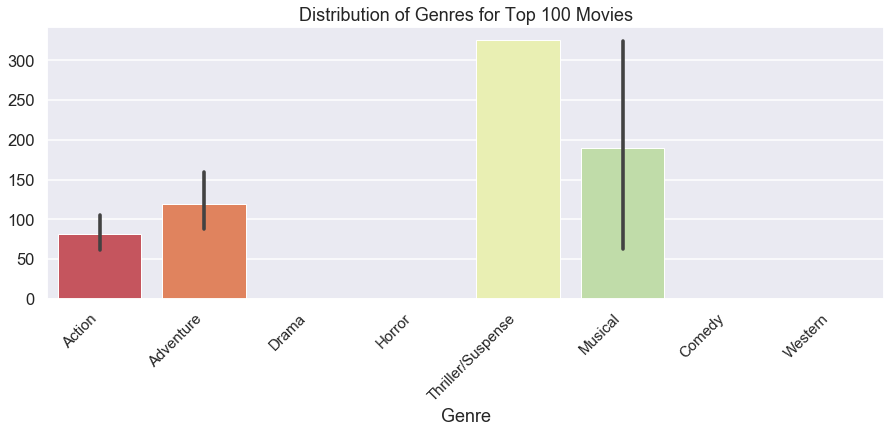

In [28]:
#plot 'genre' distribution of top 100 performers
x_values = genre_vs_100_profit['genre']
y_values = x_values.index
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, 
            linewidth = 1, palette = 'Spectral')

#set labels
plt.title('Distribution of Genres for Top 100 Movies')
plt.xlabel('Genre')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [29]:
#save
plt.savefig('genre_distribution_100_barplot')

<Figure size 432x288 with 0 Axes>

Suprisingly, for top 100 performers, Thriller/ Suspense and Musical are more popular. Adventure did not even make it into the top 3.

Let's visualize this in term of genre vs. worldwide_profit:

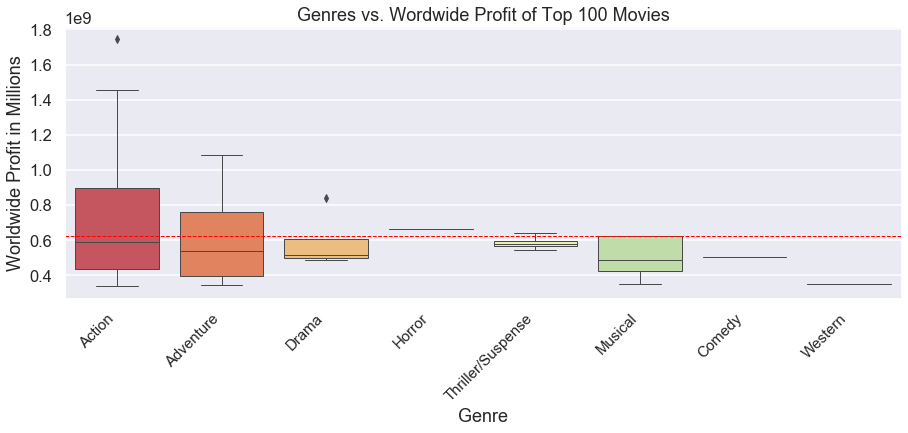

In [30]:
#plot 'genre' vs. 'worldwide_profit' of top 100 performers
plt.figure(figsize = (15, 5))
sns.boxplot(x = genre_vs_100_profit['genre'], 
            y = genre_vs_100_profit['worldwide_profit'], 
            linewidth = 1,
            palette = 'Spectral')

#draw mean()
plt.axhline(genre_vs_100_profit['worldwide_profit'].mean(), 
            ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Genres vs. Wordwide Profit of Top 100 Movies')
plt.xlabel('Genre')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [31]:
#save
plt.savefig('genre_vs_100_profit_boxplot')

<Figure size 432x288 with 0 Axes>

In [32]:
#get descriptive statistics for 'Action' production_budget
genre_vs_100_profit.loc[genre_vs_100_profit['genre'] == 'Action', 'production_budget'].describe().apply(lambda x: format(x, 'f'))

count           40.000000
mean     186775000.000000
std       65958995.615186
min       40000000.000000
25%      151500000.000000
50%      178000000.000000
75%      215500000.000000
max      365000000.000000
Name: production_budget, dtype: object

In [33]:
#get descriptive statistics for 'Action' worldwide_gross
genre_vs_100_profit.loc[genre_vs_100_profit['genre'] == 'Action', 'worldwide_profit'].describe().apply(lambda x: format(x, 'f'))

count            40.000000
mean      692522437.025000
std       333842656.971351
min       337592267.000000
25%       436626582.500000
50%       590191577.500000
75%       896020184.250000
max      1744540523.000000
Name: worldwide_profit, dtype: object

For Action genre, the mean average is 186M, which is consistent with our previous finding of 150M or higher. 

In [34]:
#get descriptive statistics for 'Adventure' production_budget
genre_vs_100_profit.loc[genre_vs_100_profit['genre'] == 'Adventure', 'production_budget'].describe().apply(lambda x: format(x, 'f'))

count           43.000000
mean     138395348.837209
std       45923403.896822
min       69000000.000000
25%       92500000.000000
50%      135000000.000000
75%      175000000.000000
max      250000000.000000
Name: production_budget, dtype: object

In [35]:
#get descriptive statistics for 'Adventure' worldwide_profit
genre_vs_100_profit.loc[genre_vs_100_profit['genre'] == 'Adventure', 'worldwide_profit'].describe().apply(lambda x: format(x, 'f'))



count            43.000000
mean      591547316.209302
std       211174711.495649
min       346258539.000000
25%       397938302.000000
50%       540644566.000000
75%       759816592.000000
max      1085631140.000000
Name: worldwide_profit, dtype: object

If we also want to consider alternative or subgenre, Adventure would need the minimum investment of 138M. 

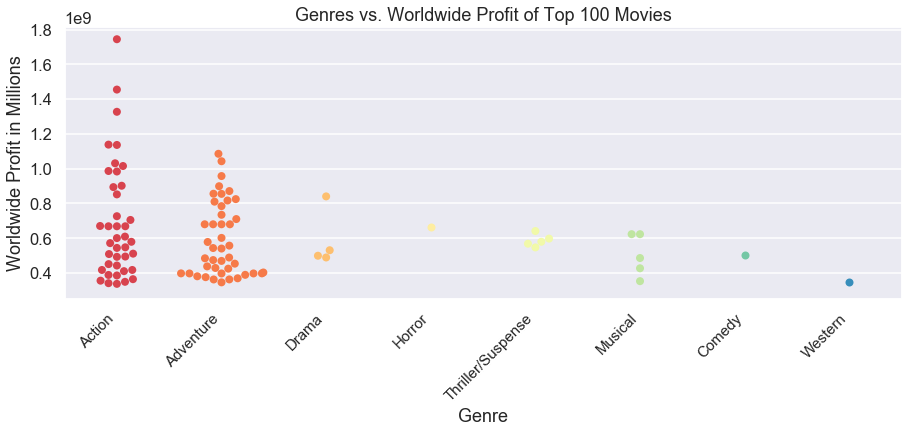

In [36]:
#plot all genres with respect to 'worldwide_gross' using swarmplot
plt.figure(figsize = (15, 5))
sns.swarmplot(x = 'genre',
              y = 'worldwide_profit',
              hue = 'genre',
              data = genre_vs_100_profit,
              s = 8, palette = 'Spectral')

#set labels
plt.title('Genres vs. Worldwide Profit of Top 100 Movies')
plt.xlabel('Genre')
plt.ylabel('Worldwide Profit in Millions')
plt.legend('',frameon=False)

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [37]:
#save
plt.savefig('genre_vs_100_profit_swarmplot')

<Figure size 432x288 with 0 Axes>

Thriller/ Suspense might be more popular but Action and Adventure make more profits. 

Let's next investigate if their high profitability is correlated with their production budget.

In [38]:
#create sub dataframe 'genre' vs. 'production_budget' of top 100 performers
genre_vs_100_budget = full_df[['genre', 
                               'production_budget']].sort_values(by = 'production_budget', 
                                                                 ascending = False)[:100]
genre_vs_100_budget.head()

,genre,production_budget
0,Action,365000000
3,Action,300000000
1,Action,300000000
2,Action,300000000
5,Adventure,275000000


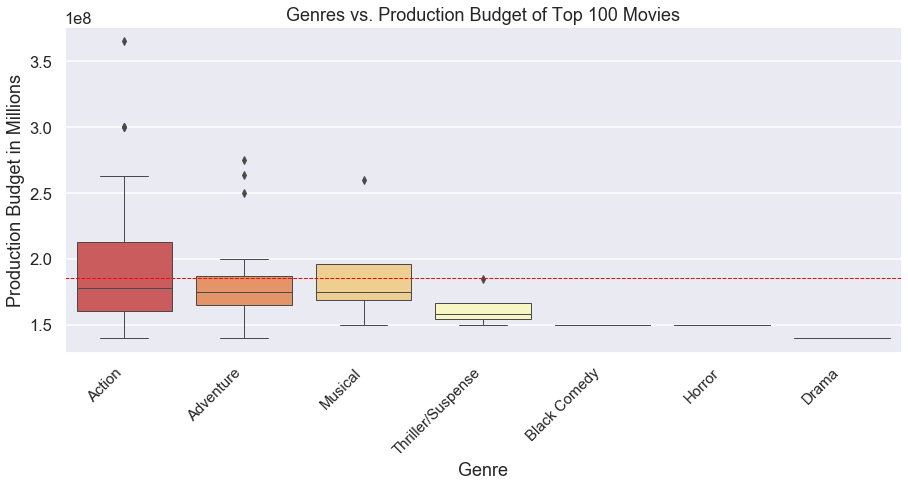

In [39]:
#plot 'genre' vs. 'production_budget' of top 100 performers
plt.figure(figsize = (15, 6))
sns.boxplot(x = genre_vs_100_budget['genre'], 
            y = genre_vs_100_budget['production_budget'], 
            linewidth = 1,
            palette = 'Spectral')

#draw mean()
plt.axhline(genre_vs_100_budget['production_budget'].mean(), 
            ls = '--', lw = 1, color = 'r', label = 'mean avg')

#set labels
plt.title('Genres vs. Production Budget of Top 100 Movies')
plt.xlabel('Genre')
plt.ylabel('Production Budget in Millions')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [40]:
#save
plt.savefig('genre_vs_100_budget_boxplot')

<Figure size 432x288 with 0 Axes>

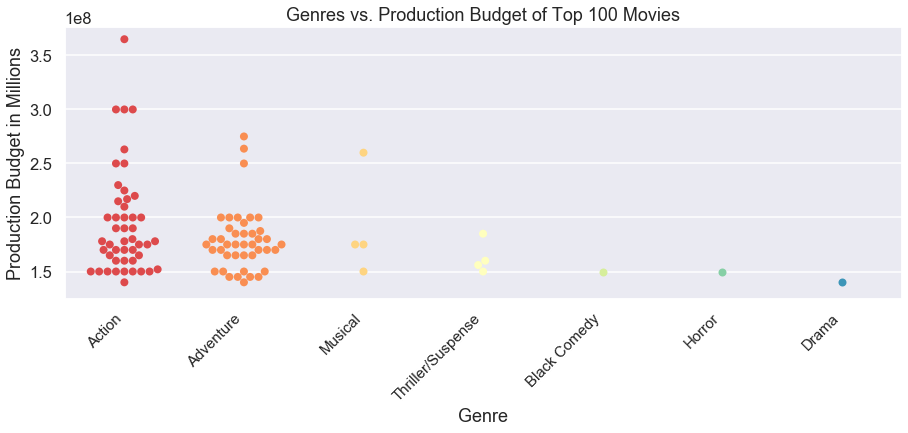

In [41]:
#plot all genres with respect to 'production_budget' using swarmplot
plt.figure(figsize = (15, 5))
sns.swarmplot(x = 'genre',
            y = 'production_budget',
            hue = 'genre',
            data = genre_vs_100_budget,
            s = 8, palette = 'Spectral')

#set labels
plt.title('Genres vs. Production Budget of Top 100 Movies')
plt.xlabel('Genre')
plt.ylabel('Production Budget in Millions')
plt.legend('',frameon=False)

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [42]:
#save
plt.savefig('genre_vs_100_budget_swarmplot')

<Figure size 432x288 with 0 Axes>

It also makes sense why Thriller/ Suspense are the most popular genre: their production budget is lower compared to Action and Adventure.

<Figure size 1080x1080 with 0 Axes>

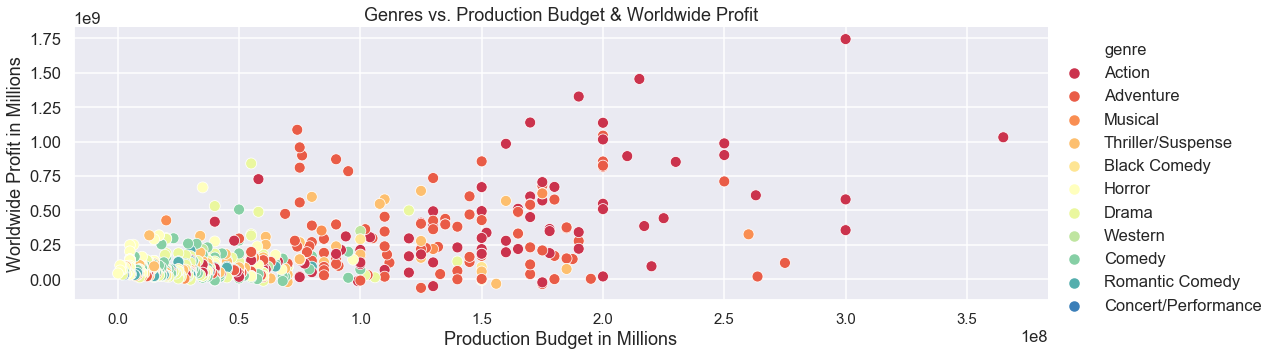

In [43]:
#plot all genres with respect to 'production_budget' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'production_budget',
            y = 'worldwide_profit',
            hue = 'genre',
            data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#set labels
plt.title('Genres vs. Production Budget & Worldwide Profit')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [44]:
#save
plt.savefig('genre_budget_profit_relplot')

<Figure size 432x288 with 0 Axes>

We see that Action, Adventure are the most lucrative genres but also costs the most to create.  

For genres, we recommend that the next movie is a mix of Action and Adventure, which will cost us within the range of 150M and higher.

Now we are taking a look at Source, Creative Type, Production Method in correlation with Profit. Let's look at the distribution of each of these.

### Source

In [45]:
#source_distribution values
y_values = full_df['source'].value_counts(ascending=False)
x_values = y_values.index

y_values

Original Screenplay                    308
Based on Fiction Book/Short Story      106
Based on Comic/Graphic Novel            45
Based on Real Life Events               41
Based on Factual Book/Article           33
Based on TV                             22
Based on Folk Tale/Legend/Fairytale     19
Based on Short Film                     13
Remake                                  11
Based on Game                           11
Spin-Off                                 9
Based on Religious Text                  4
Based on Play                            3
Based on Toy                             2
Based on Musical or Opera                2
Name: source, dtype: int64

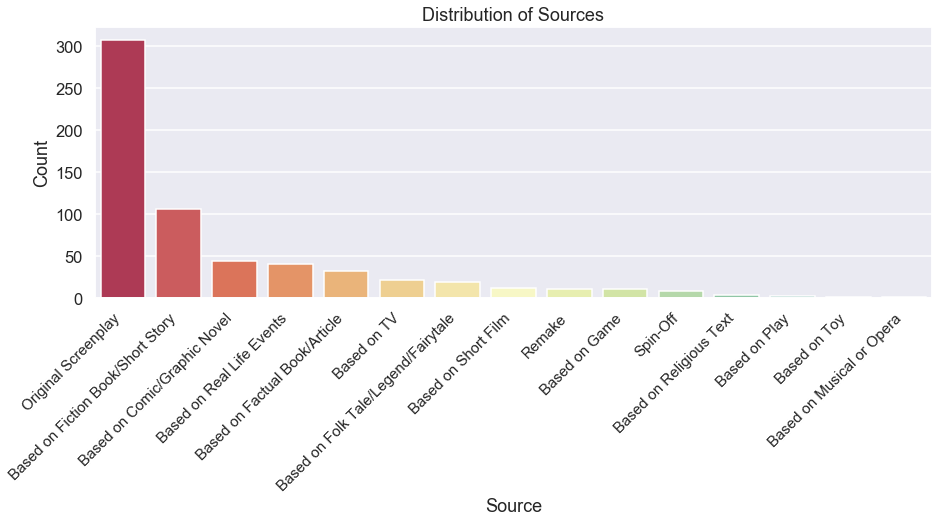

In [46]:
#plot distribution of 'source' for all movies
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, palette = 'Spectral')

#set labels
plt.title('Distribution of Sources')
plt.xlabel('Source')
plt.ylabel('Count')

#set xticks
plt.xticks(rotation = 45, ha='right', fontsize = 15)

#show
plt.show()

In [47]:
#save
plt.savefig('source_distribution_barplot')

<Figure size 432x288 with 0 Axes>

We see that Original Screenplay and Fictiona Book/ Short Story are the most popular. But just because they're popular sources doesn't mean that they generate the highest profit. Let's see which one performs the best by taking a look at source distribution for top 100 performers.

In [48]:
#create sub dataset for 'source' and 'worldwide_profit' for top 100 performers
source_vs_100_profit = full_df[['source', 'production_budget',
                               'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                ascending = False)[:100]
source_vs_100_profit.head()

,source,production_budget,worldwide_profit
1,Based on Comic/Graphic Novel,300000000,1744540523
16,Based on Fiction Book/Short Story,215000000,1454943967
31,Original Screenplay,190000000,1327179709
59,Based on Fiction Book/Short Story,170000000,1138334005
21,Based on Comic/Graphic Novel,200000000,1136498912


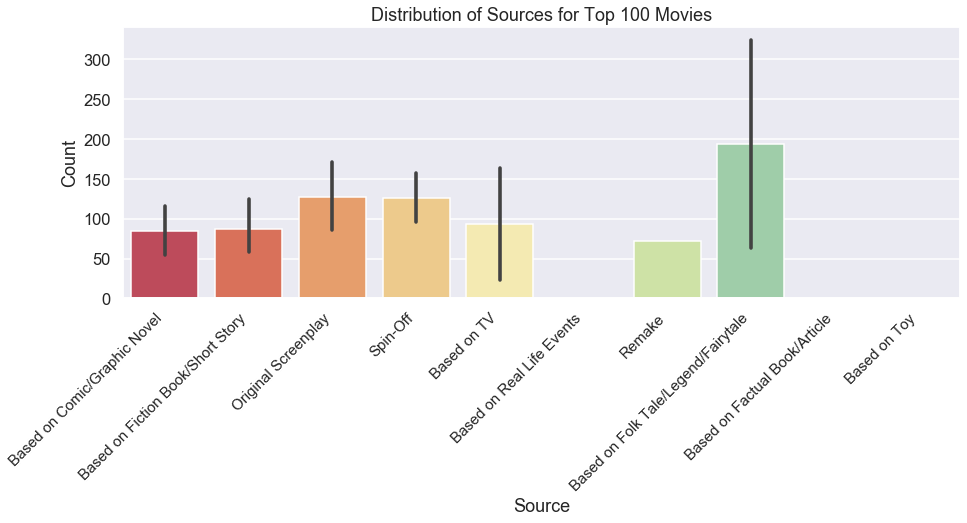

In [114]:
#plot 'source' distribution of top 100 performers
x_values = source_vs_100_profit['source']
y_values = x_values.index
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, palette = 'Spectral')

#set labels
plt.title('Distribution of Sources for Top 100 Movies')
plt.xlabel('Source')
plt.ylabel('Count')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [115]:
#save
plt.savefig('source_distribution_100_barplot')

<Figure size 432x288 with 0 Axes>

We can see here, again, by comparing the dataset with the distribution plot, just because movies based on Folk Tale/ Legend/ Fairytale is the most popular among top 100, they don't generate that highest profit. Let's look at this feature in term of worldwide_profit.

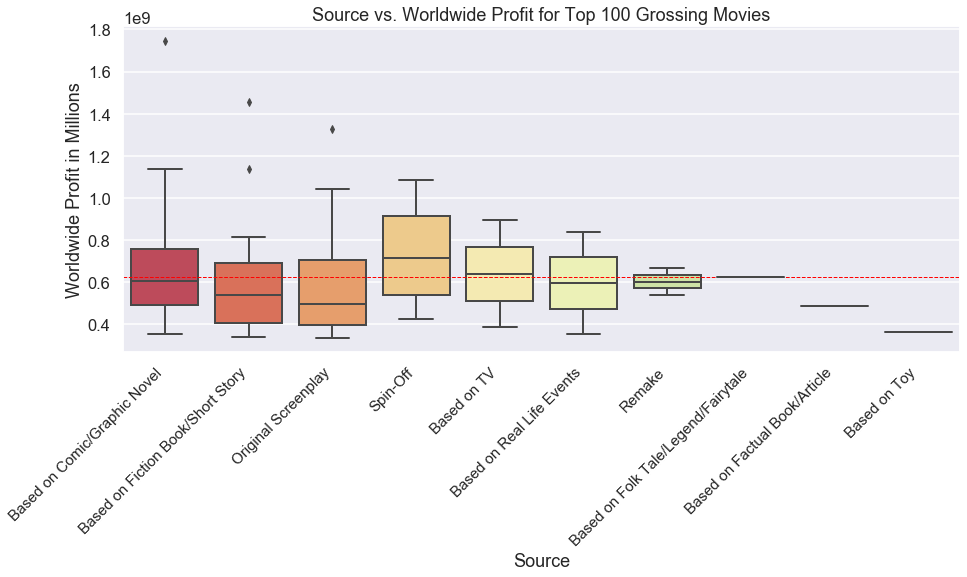

In [51]:
#plot 'source' vs. 'worldwide_profit' for top 100 performers
plt.figure(figsize = (15, 6))
sns.boxplot(x = source_vs_100_profit['source'], 
            y = source_vs_100_profit['worldwide_profit'], 
            palette = 'Spectral')

#draw mean()
plt.axhline(source_vs_100_profit['worldwide_profit'].mean(), 
            ls = '--', lw = 1, color = 'r')

#set labels
plt.title('Source vs. Worldwide Profit for Top 100 Grossing Movies')
plt.xlabel('Source')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(rotation = 45, ha='right', fontsize = 15)

#show
plt.show()

In [52]:
#save
plt.savefig('soure_vs_100_profit_boxplot')

<Figure size 432x288 with 0 Axes>

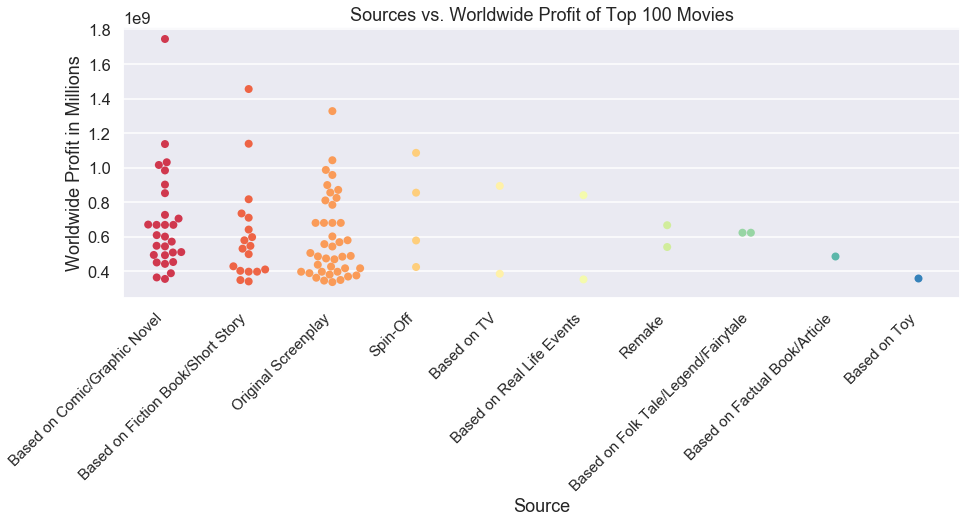

In [53]:
#plot all sources with respect to 'worldwide_profit' using swarmplot
plt.figure(figsize = (15, 5))
sns.swarmplot(x = 'source',
            y = 'worldwide_profit',
            hue = 'source',
            data = source_vs_100_profit,
            s = 8, palette = 'Spectral',)

#set labels
plt.title('Sources vs. Worldwide Profit of Top 100 Movies')
plt.xlabel('Source')
plt.ylabel('Worldwide Profit in Millions')
plt.legend('',frameon=False)

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [54]:
#save
plt.savefig('source_vs_100_profit_swarmplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

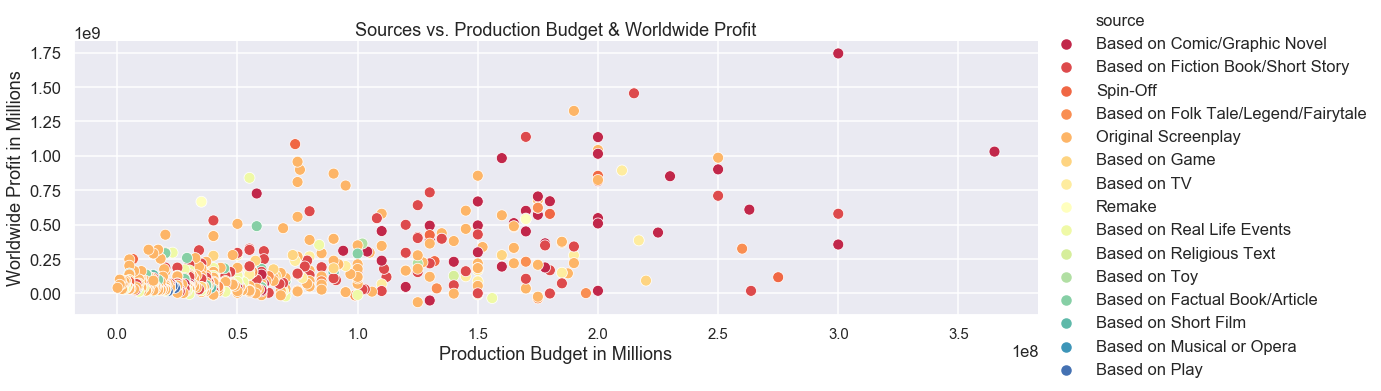

In [55]:
#plot all 'source' with respect to 'production_budget' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'production_budget',
            y = 'worldwide_profit',
            hue = 'source',
            data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#set labels
plt.title('Sources vs. Production Budget & Worldwide Profit')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [56]:
#save
plt.savefig('source_budget_profit_scatterplot')

<Figure size 432x288 with 0 Axes>

In [57]:
#get descriptive statistics for 'Adventure' production_budget
source_vs_100_profit.loc[source_vs_100_profit['source'] == 'Based on Comic/Graphic Novel', 'production_budget'].describe().apply(lambda x: format(x, 'f'))


count           28.000000
mean     189428571.428571
std       63190733.363910
min       58000000.000000
25%      150000000.000000
50%      175000000.000000
75%      206250000.000000
max      365000000.000000
Name: production_budget, dtype: object

In [58]:
#get descriptive statistics for 'Adventure' worldwide_profit
source_vs_100_profit.loc[source_vs_100_profit['source'] == 'Based on Comic/Graphic Novel', 'worldwide_profit'].describe().apply(lambda x: format(x, 'f'))


count            28.000000
mean      682638590.285714
std       297298960.741626
min       355945209.000000
25%       494238052.000000
50%       605138743.000000
75%       758068922.000000
max      1744540523.000000
Name: worldwide_profit, dtype: object

For source, we recommend that our movie is to based on Comic/ Graphic Novel or Finction Book/ Short Story, which will cost us 189M on average. This makes sense when our recommended genres are Action and Adventure. Superhero movies are doing very well statistically.

### Creative Type

Let's look at 'creative_type' for all movies:

In [59]:
#creative_type values
y_values = full_df['creative_type'].value_counts(ascending = False)
x_values = y_values.index

y_values

Contemporary Fiction       291
Kids Fiction                73
Science Fiction             67
Fantasy                     60
Dramatization               59
Historical Fiction          42
Super Hero                  33
Factual                      3
Multiple Creative Types      1
Name: creative_type, dtype: int64

Comtemporary Fiction is the most popular overall.

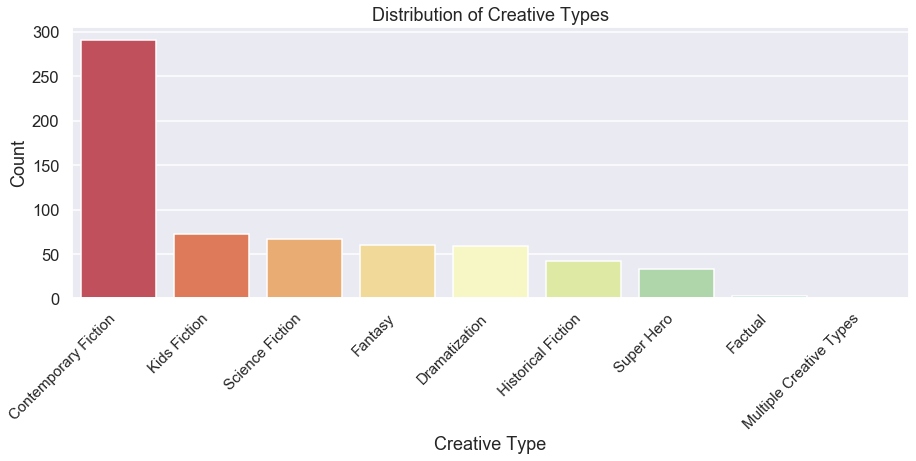

In [60]:
#plot 'creative_type' for all movies
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, palette='Spectral')

#set labels
plt.title('Distribution of Creative Types')
plt.xlabel('Creative Type')
plt.ylabel('Count')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [61]:
#save
plt.savefig('creative_type_distribution_barplot')

<Figure size 432x288 with 0 Axes>

Is this the same for top 100 performers?

In [62]:
#create sub dataset for 'creative_type' vs. 'worldwide_profit' for top 100 performers
creative_type_vs_100_profit = full_df[['creative_type', 'production_budget',
                                       'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                        ascending = False)[:100]
creative_type_vs_100_profit.head()

,creative_type,production_budget,worldwide_profit
1,Super Hero,300000000,1744540523
16,Science Fiction,215000000,1454943967
31,Contemporary Fiction,190000000,1327179709
59,Science Fiction,170000000,1138334005
21,Super Hero,200000000,1136498912


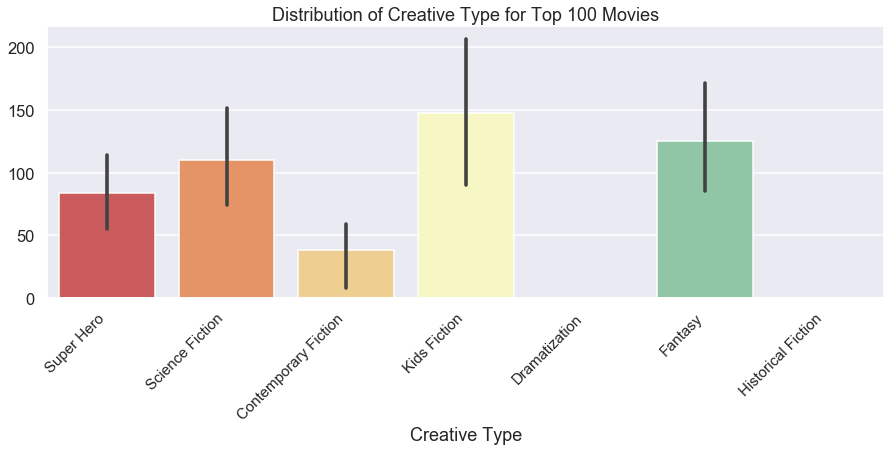

In [63]:
#plot distribution of 'creative_type' for top 100 performers
x_values = creative_type_vs_100_profit['creative_type']
y_values = x_values.index
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, palette = 'Spectral')

#set labels
plt.title('Distribution of Creative Type for Top 100 Movies')
plt.xlabel('Creative Type')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [ ]:
#save
plt.savefig('creative_type_distribution_barplot_100')

Now look at this in term of 'worldwide_profit'

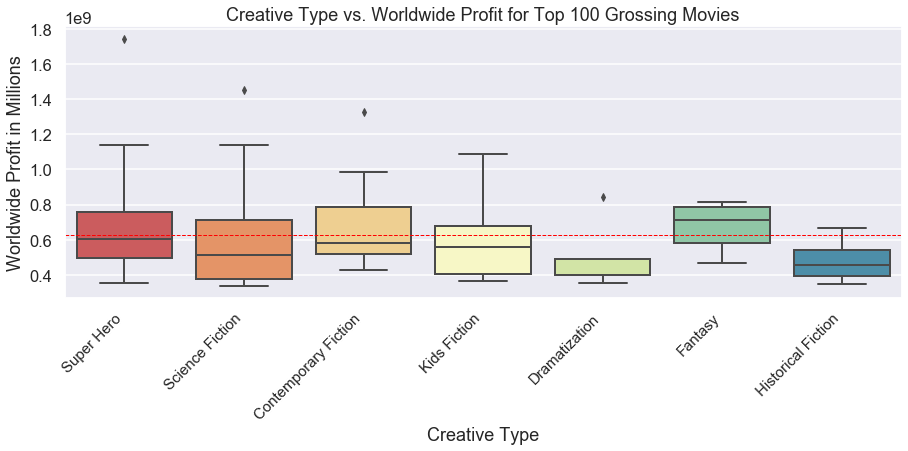

In [64]:
#plot 'creative_type' vs. 'worldwide_profit' for top 100 performers
plt.figure(figsize = (15, 5))
sns.boxplot(x = creative_type_vs_100_profit['creative_type'], 
            y = creative_type_vs_100_profit['worldwide_profit'],
            palette = 'Spectral')

#draw mean()
plt.axhline(creative_type_vs_100_profit['worldwide_profit'].mean(), 
            ls = '--', lw = 1, color = 'r', label = 'mean avg')

#set labels
plt.title('Creative Type vs. Worldwide Profit for Top 100 Grossing Movies')
plt.xlabel('Creative Type')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [65]:
#save
plt.savefig('creative_type_vs_100_profit_boxplot')

<Figure size 432x288 with 0 Axes>

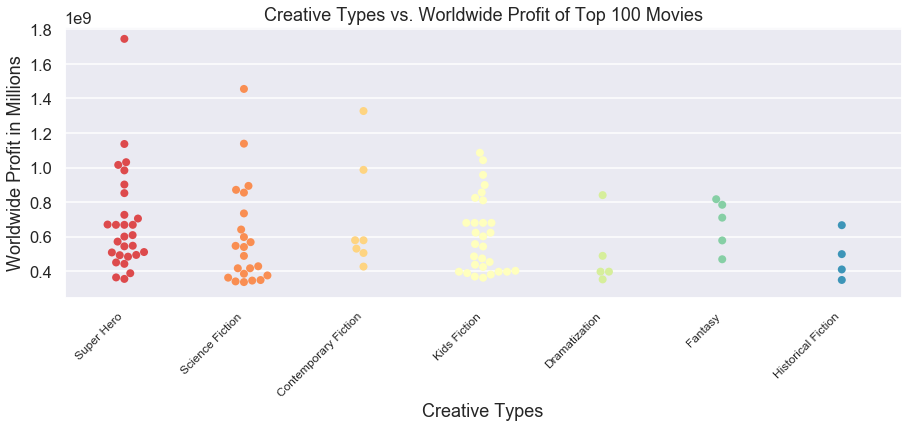

In [66]:
#plot all creative types with respect to 'worldwide_profit' using swarmplot
plt.figure(figsize = (15, 5))
sns.swarmplot(x = 'creative_type',
              y = 'worldwide_profit',
              hue = 'creative_type',
              data = creative_type_vs_100_profit,
              s = 8, palette = 'Spectral',)

#set labels
plt.title('Creative Type vs. Worldwide Profit of Top 100 Movies')
plt.xlabel('Creative Type')
plt.ylabel('Worldwide Profit in Millions')
plt.legend('',frameon=False)

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 12)

#show
plt.show()

In [67]:
#save
plt.savefig('creative_type_vs_100_profit_swarmplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

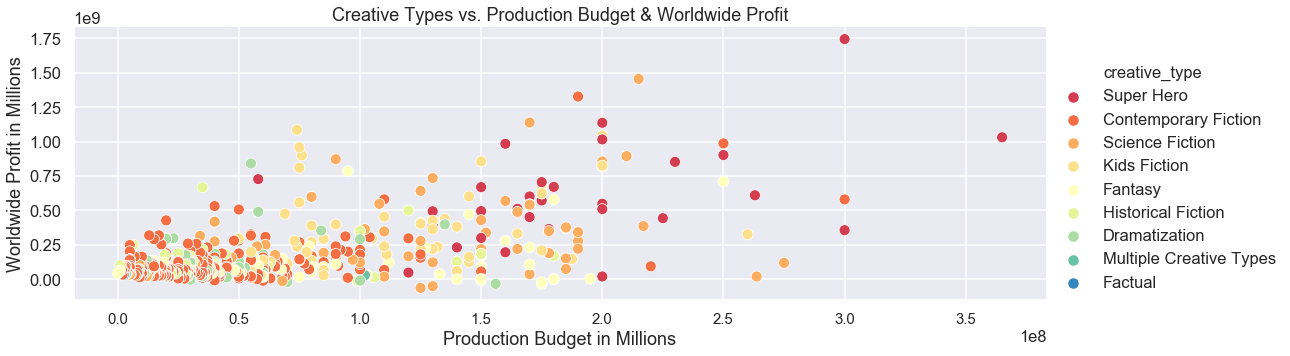

In [68]:
#plot all 'creative_type' with respect to 'production_budget' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'production_budget',
            y = 'worldwide_profit',
            hue = 'creative_type',
            data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#set labels
plt.title('Creative Types vs. Production Budget & Worldwide Profit')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [69]:
#save
plt.savefig('creative_type_budget_profit_relplot')

<Figure size 432x288 with 0 Axes>

In [70]:
#get descriptive statistics for 'Super Hero' production_budget
creative_type_vs_100_profit.loc[creative_type_vs_100_profit['creative_type'] == 'Super Hero', 'production_budget'].describe().apply(lambda x: format(x, 'f'))


count           28.000000
mean     191392857.142857
std       61461423.785628
min       58000000.000000
25%      157500000.000000
50%      175000000.000000
75%      206250000.000000
max      365000000.000000
Name: production_budget, dtype: object

In [71]:
#get descriptive statistics for 'Super Hero' worldwide_profit
creative_type_vs_100_profit.loc[creative_type_vs_100_profit['creative_type'] == 'Super Hero', 'worldwide_profit'].describe().apply(lambda x: format(x, 'f'))


count            28.000000
mean      683743373.464286
std       296473219.673735
min       355945209.000000
25%       494238052.000000
50%       605138743.000000
75%       758068922.000000
max      1744540523.000000
Name: worldwide_profit, dtype: object

As predicted, action + adventure + comic graphic/ novel + superhero is our success formula here. The budget is now at 191M.

### Production Method

In [72]:
#production_method_distribution values for all movies
y_values = full_df['production_method'].value_counts(ascending = False)
x_values = y_values.index

y_values

Live Action              515
Digital Animation         57
Animation/Live Action     53
Stop-Motion Animation      4
Name: production_method, dtype: int64

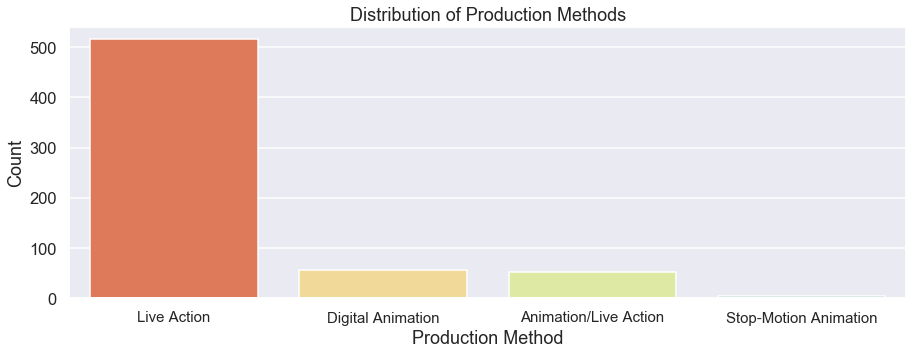

In [73]:
#plot distribution of 'production_method' for all movies
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, palette = 'Spectral')

#set labels
plt.title('Distribution of Production Methods')
plt.xlabel('Production Method')
plt.ylabel('Count')

#setxticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [74]:
#save
plt.savefig('production_method_distribution_barplot.png')

<Figure size 432x288 with 0 Axes>

Now we look at our 100 winners.

In [75]:
#create sub dataset for 'production_method' vs. 'worldwide_profit' for top 100 performers
production_method_vs_100_profit = full_df[['production_method', 'production_budget',
                                           'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                            ascending = False)[:100]
production_method_vs_100_profit.head()

,production_method,production_budget,worldwide_profit
1,Animation/Live Action,300000000,1744540523
16,Live Action,215000000,1454943967
31,Live Action,190000000,1327179709
59,Live Action,170000000,1138334005
21,Live Action,200000000,1136498912


In [76]:
production_method_vs_100_profit.describe()

,production_budget,worldwide_profit
count,1.000000e+02,1.000000e+02
mean,1.506700e+08,6.246844e+08
std,6.402336e+07,2.616154e+08
min,2.000000e+07,3.375923e+08
25%,1.065000e+08,4.231176e+08
50%,1.500000e+08,5.526732e+08
75%,1.850000e+08,7.287289e+08
max,3.650000e+08,1.744541e+09


For production method, general trend and top 100 performers are the same. Animation/ Live Action is it. Let's visualize this.

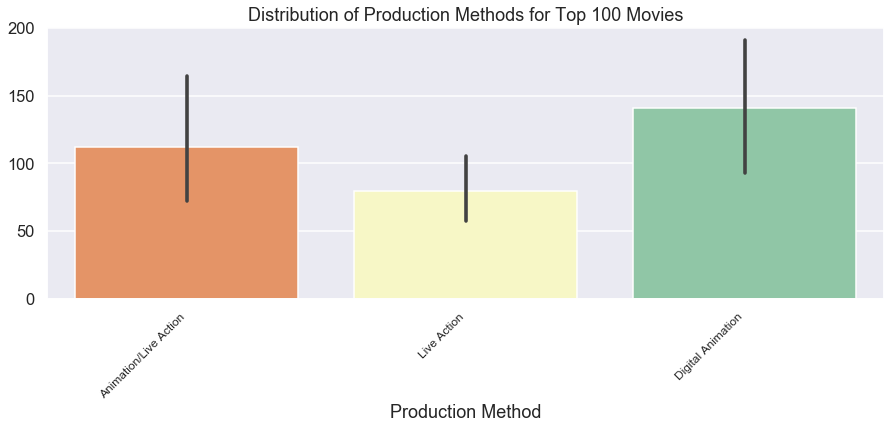

In [77]:
#plot distribution of 'production_method' for top 100 performers
x_values = production_method_vs_100_profit['production_method']
y_values = x_values.index
plt.figure(figsize = (15, 5))
sns.barplot(x_values, y_values, palette = 'Spectral')

#set labels
plt.title('Distribution of Production Methods for Top 100 Movies')
plt.xlabel('Production Method')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 12)

#show
plt.show()

In [78]:
#save
plt.savefig('production_method_distribution_100_barplot')

<Figure size 432x288 with 0 Axes>

Again, in term of worldwide_profit:

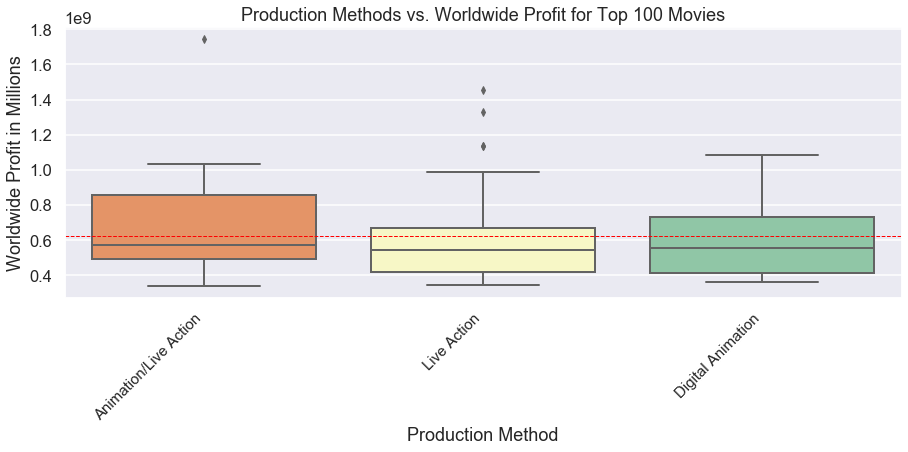

In [79]:
#plot 'production_method' vs. 'worldwide_profit' for top 100 performers
plt.figure(figsize = (15, 5))
sns.boxplot(x = production_method_vs_100_profit['production_method'], 
            y = production_method_vs_100_profit['worldwide_profit'],
            palette = 'Spectral')

#draw mean()
plt.axhline(production_method_vs_100_profit['worldwide_profit'].mean(), 
            ls = '--', lw = 1, color = 'r', label = 'mean avg')

#set labels
plt.title('Production Methods vs. Worldwide Profit for Top 100 Movies')
plt.xlabel('Production Method')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 15)

#show
plt.show()

In [80]:
#save
plt.savefig('production_method_vs_100_profit_boxplot')

<Figure size 432x288 with 0 Axes>

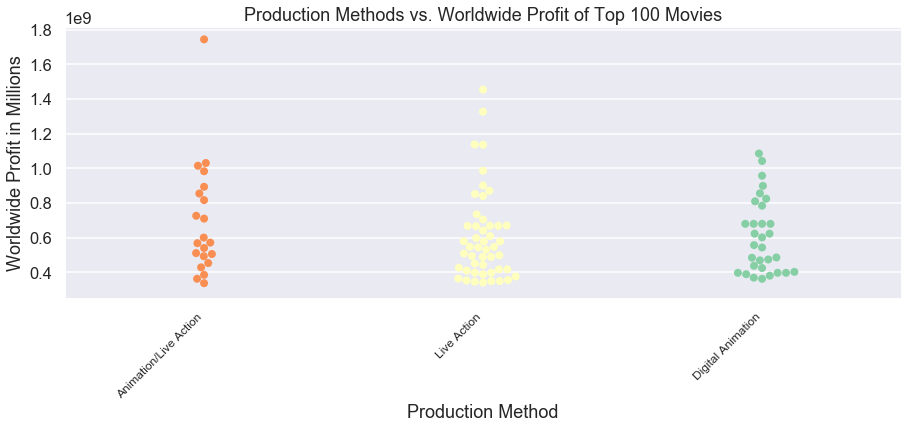

In [81]:
#plot all 'production_method' with respect to 'worldwide_profit' using swarmplot
plt.figure(figsize = (15, 5))
sns.swarmplot(x = 'production_method',
              y = 'worldwide_profit',
              hue = 'production_method',
              data = production_method_vs_100_profit,
              s = 8, palette = 'Spectral',)

#set labels
plt.title('Production Methods vs. Worldwide Profit of Top 100 Movies')
plt.xlabel('Production Method')
plt.ylabel('Worldwide Profit in Millions')
plt.legend('',frameon=False)

#set xticks
plt.xticks(rotation = 45, ha = 'right', fontsize = 12)

#show
plt.show()

In [82]:
#save
plt.savefig('production_method_vs_100_profit_swarmplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

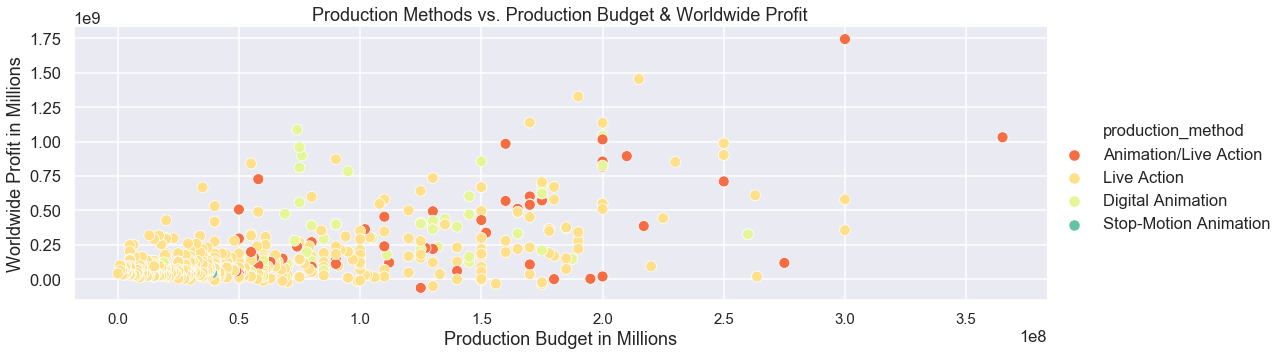

In [83]:
#plot all 'production_method' with respect to 'production_budget' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'production_budget',
            y = 'worldwide_profit',
            hue = 'production_method',
            data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#set labels
plt.title('Production Methods vs. Production Budget & Worldwide Profit')
plt.xlabel('Production Budget in Millions')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [84]:
#save
plt.savefig('production_method_budget_profit_relplot')

<Figure size 432x288 with 0 Axes>

In [85]:
#get descriptive statistics for 'Animation/Live Action' production_budget
production_method_vs_100_profit.loc[production_method_vs_100_profit['production_method'] == 'Animation/Live Action', 'production_budget'].describe().apply(lambda x: format(x, 'f'))


count           21.000000
mean     175904761.904762
std       72402972.840834
min       50000000.000000
25%      150000000.000000
50%      170000000.000000
75%      200000000.000000
max      365000000.000000
Name: production_budget, dtype: object

In [86]:
#get descriptive statistics for 'Animation/Live Action' worldwide_profit
production_method_vs_100_profit.loc[production_method_vs_100_profit['production_method'] == 'Animation/Live Action', 'worldwide_profit'].describe().apply(lambda x: format(x, 'f'))


count            21.000000
mean      692374419.476190
std       325430502.390983
min       337592267.000000
25%       493144660.000000
50%       571846894.000000
75%       855135598.000000
max      1744540523.000000
Name: worldwide_profit, dtype: object

For Animation/Live Action, the average budget is 175M.

## Question 3: Can popularity or words of mouth, in term of rating and number of votes, affect the performance of a movie?

### Popularity

In [87]:
#get the attributes
full_df.columns

Index(['movie', 'release_year', 'studio', 'language', 'popularity',
       'runtime_minutes', 'average_rating', 'num_votes', 'release_date',
       'genre', 'source', 'production_method', 'creative_type',
       'production_budget', 'domestic_gross', 'international_gross',
       'worldwide_gross', 'worldwide_profit', 'domestic_profit',
       'international_profit', 'worldwide_profit_margin', 'budget_range'],
      dtype='object')

In [88]:
#create sub dataset for 'popularity' and 'average_rating'
#all movies
rating_vs_profit = full_df[['movie', 'popularity', 'average_rating', 'num_votes', 'worldwide_profit']]

#top 100 performers
rating_vs_100_profit = full_df[['movie', 'popularity', 'average_rating', 'num_votes',
                                'worldwide_profit']].sort_values(by = 'worldwide_profit', 
                                                                 ascending = False)[:100]


In [89]:
rating_vs_profit.head()

,movie,popularity,average_rating,num_votes,worldwide_profit
0,Avengers: Age of Ultron,44.383,7.3,665594,1031099202
1,Avengers: Infinity War,80.773,8.5,670926,1744540523
2,Justice League,34.953,6.5,329135,355945209
3,Spectre,30.318,6.8,352504,579500760
4,The Dark Knight Rises,26.220,8.4,1387769,852228107


Does having a high score in 'popularity' or 'average_rating' means higher profit?

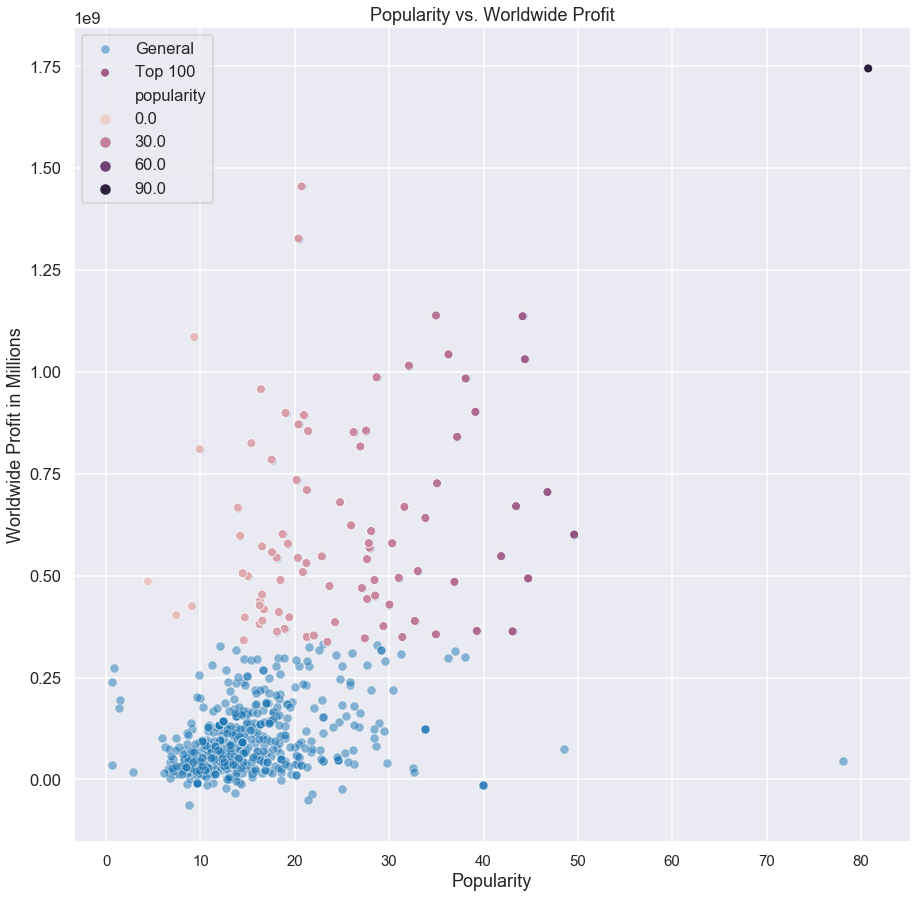

In [90]:
#plot 'popularity' vs. 'worldwide_profit'
plt.figure(figsize = (15, 15))

#popularity
sns.scatterplot(x = rating_vs_profit['popularity'],
                      y = rating_vs_profit['worldwide_profit'],
                      label = 'General', alpha = 0.5)

sns.scatterplot(x = rating_vs_100_profit['popularity'],
                      y = rating_vs_profit['worldwide_profit'],
                      hue = rating_vs_profit['popularity'],
                      label = 'Top 100')

#set labels
plt.title('Popularity vs. Worldwide Profit')
plt.xlabel('Popularity')
plt.ylabel('Worldwide Profit in Millions')
plt.legend(loc='upper left')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [91]:
#save
plt.savefig('popularity_vs_profit_scatterplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

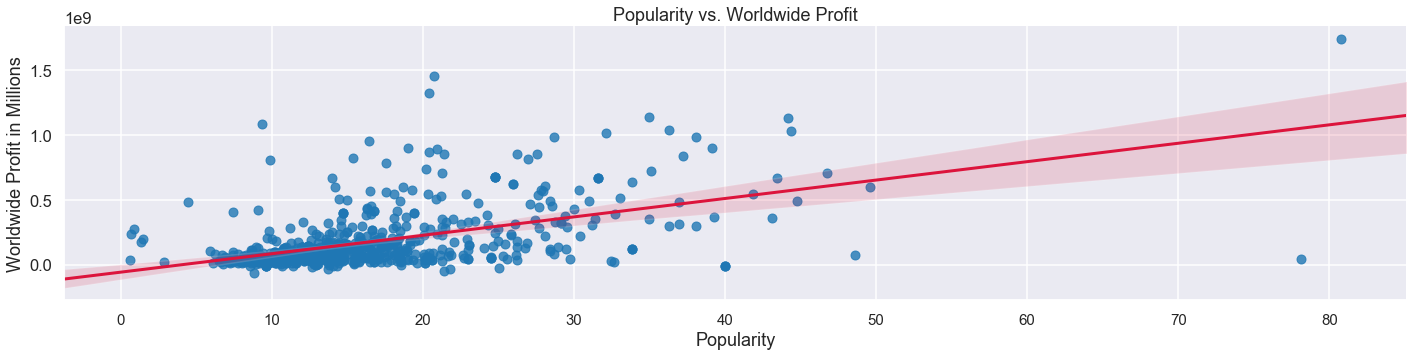

In [92]:
#plot 'popularity' vs. worldwide_profit'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'popularity',
           y = 'worldwide_profit',
           data = full_df, 
           aspect = 4, line_kws={'color': 'crimson'})

#set labels
plt.title('Popularity vs. Worldwide Profit')
plt.xlabel('Popularity')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [93]:
#save
plt.savefig('popularity_vs_profit_lmplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

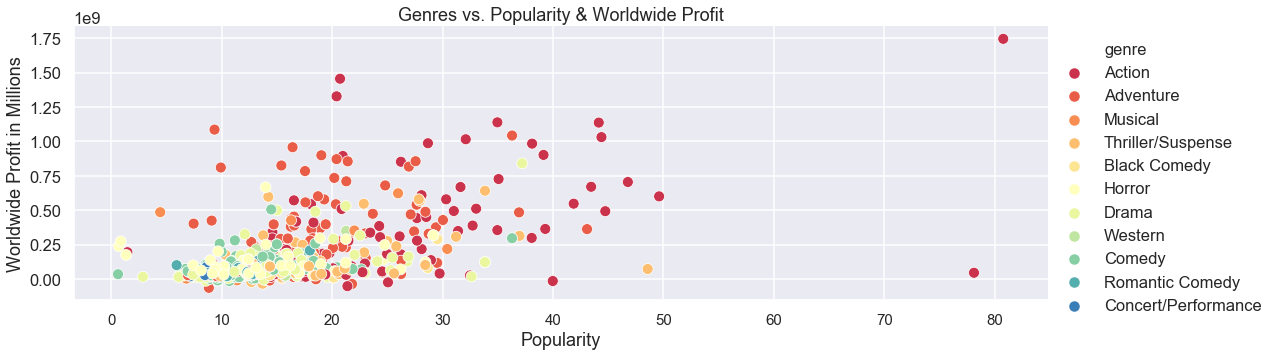

In [116]:
#plot all 'genre' with respect to 'popularity' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'popularity',
            y = 'worldwide_profit',
            hue = 'genre',
            data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#set labels
plt.title('Genres vs. Popularity & Worldwide Profit')
plt.xlabel('Popularity')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [118]:
#save
plt.savefig('genre_popularity_profit_relplot')

<Figure size 432x288 with 0 Axes>

We can see here again, Action and Adventure are not only the highgest grossing genres but also the most popular genres.

<Figure size 1080x1080 with 0 Axes>

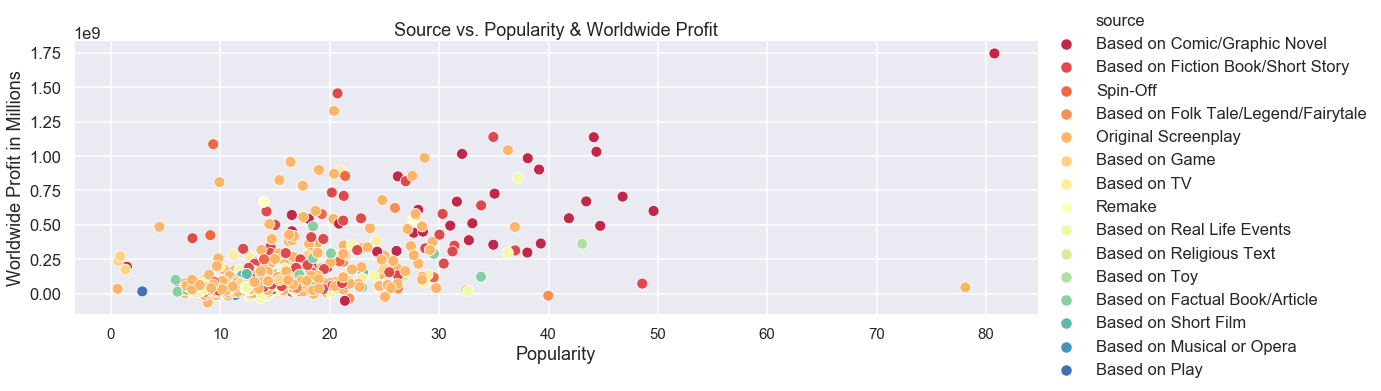

In [96]:
#plot all 'source' with respect to 'popularity' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'popularity',
            y = 'worldwide_profit',
            hue = 'source',
            data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#set labels
plt.title('Source vs. Popularity & Worldwide Profit')
plt.xlabel('Popularity')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [97]:
#save
plt.savefig('source_vs_popularity_profit_relplot')

<Figure size 432x288 with 0 Axes>

Same with source Based on Comic/Graphic Novel which score very high on both popularity range and worldwide profit.

<Figure size 1080x1080 with 0 Axes>

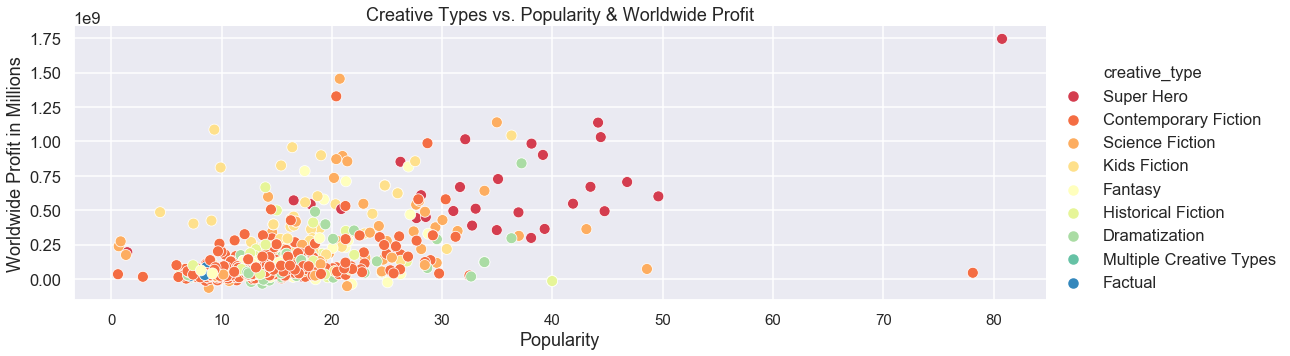

In [98]:
#plot all 'creative_type' with respect to 'popularity' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'popularity',
            y = 'worldwide_profit',
            hue = 'creative_type',
            data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#set labels
plt.title('Creative Types vs. Popularity & Worldwide Profit')
plt.xlabel('Popularity')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [99]:
#save
plt.savefig('creative_type_popularity_profit_relplot')

<Figure size 432x288 with 0 Axes>

Here we can see Super Hero and Comtemporary being in very close competition. Super Hero takes a lead, however.

<Figure size 1080x1080 with 0 Axes>

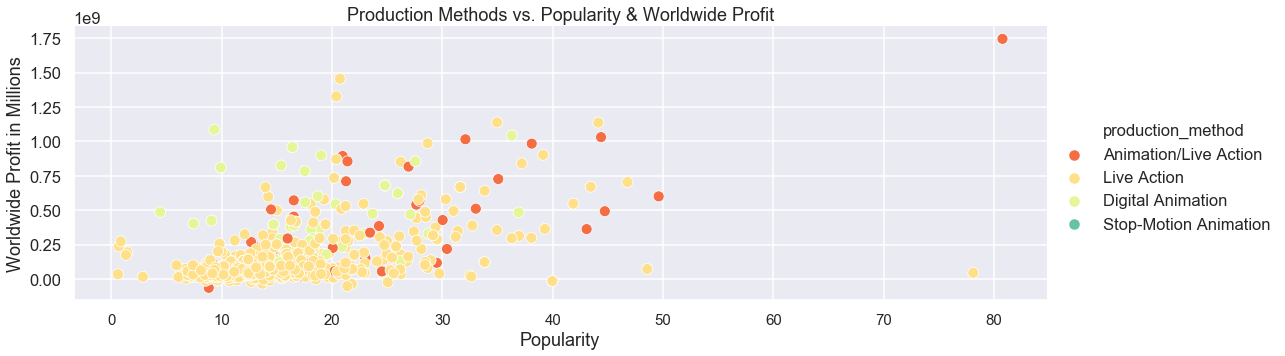

In [100]:
#plot all 'production_method' with respect to 'popularity' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'popularity',
            y = 'worldwide_profit',
            hue = 'production_method',
            data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#set labels
plt.title('Production Methods vs. Popularity & Worldwide Profit')
plt.xlabel('Popularity')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [101]:
#save
plt.savefig('production_method_popularity_profit_relplot')

<Figure size 432x288 with 0 Axes>

Once again confirming our previous finding, Animation/ Live Action is the winner on popularity and worldwide profit.

### Average Rating 

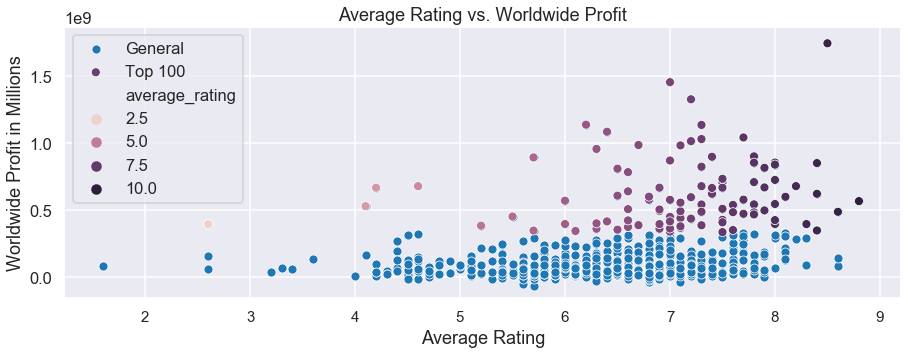

In [102]:
#plot 'average_rating' vs. 'worldwide_profit'
plt.figure(figsize = (15, 5))

#average_rating for all movies
ax1 = sns.scatterplot(x = rating_vs_profit['average_rating'],
                      y = rating_vs_profit['worldwide_profit'],
                      label = 'General')

#average_rating for top 100 performers
ax1 = sns.scatterplot(x = rating_vs_100_profit['average_rating'],
                      y = rating_vs_profit['worldwide_profit'],
                      hue = rating_vs_100_profit['average_rating'],
                      label = 'Top 100')

#set labels
plt.title('Average Rating vs. Worldwide Profit')
plt.xlabel('Average Rating')
plt.ylabel('Worldwide Profit in Millions')
plt.legend(loc='upper left')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [103]:
#save
plt.savefig('average_rating_vs_profit_scatterplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

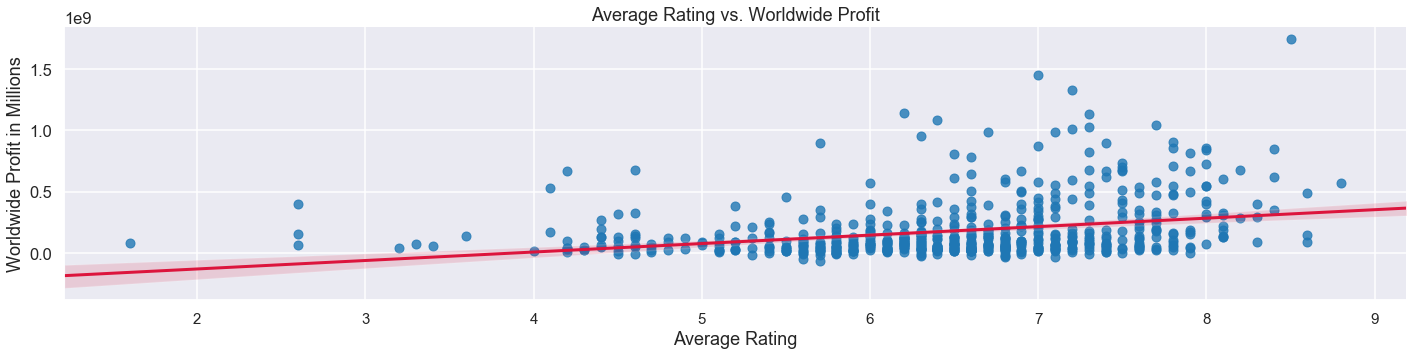

In [104]:
#plot 'average_rating' vs. worldwide_profit'
plt.figure(figsize = (15, 5))
sns.lmplot(x = 'average_rating',
           y = 'worldwide_profit',
           data = full_df, 
           aspect = 4, line_kws={'color': 'crimson'})

#set labels
plt.title('Average Rating vs. Worldwide Profit')
plt.xlabel('Average Rating')
plt.ylabel('Worldwide Profit in Millions')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [105]:
#save
plt.savefig('rating_vs_profit_lmplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

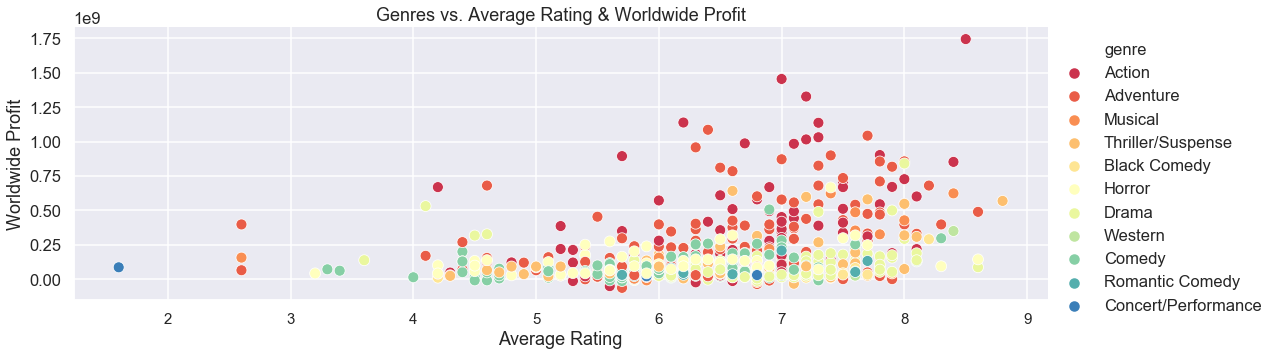

In [106]:
#plot all 'genre' with respect to 'rating' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'average_rating', 
           y = 'worldwide_profit',
            hue = 'genre',
           data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#set labels
plt.title('Genres vs. Average Rating & Worldwide Profit')
plt.xlabel('Average Rating')
plt.ylabel('Worldwide Profit')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [107]:
#save
plt.savefig('genre_rating_profit_relplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

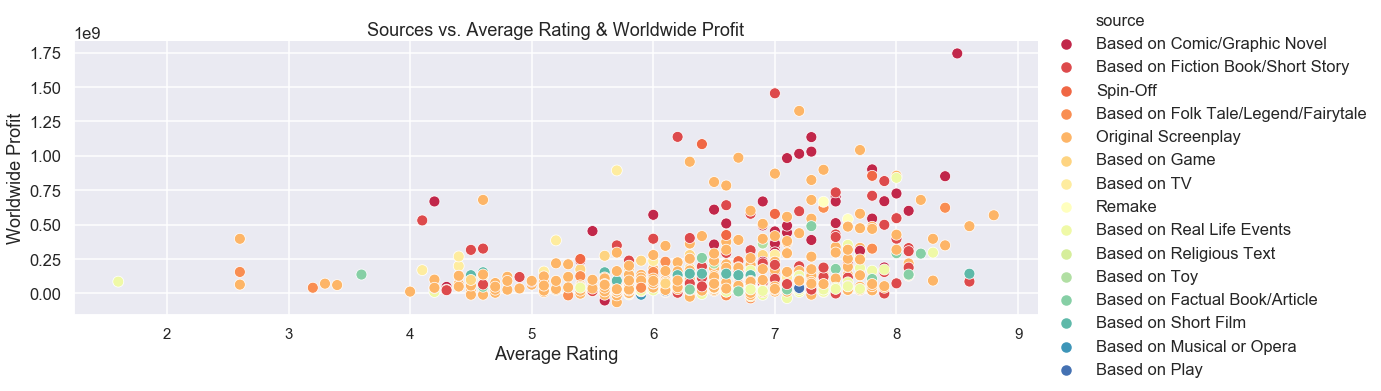

In [108]:
#plot all 'source' with respect to 'rating' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'average_rating', 
           y = 'worldwide_profit',
            hue = 'source',
           data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#set labels
plt.title('Sources vs. Average Rating & Worldwide Profit')
plt.xlabel('Average Rating')
plt.ylabel('Worldwide Profit')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [109]:
#save
plt.savefig('source_rating_profit_relplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

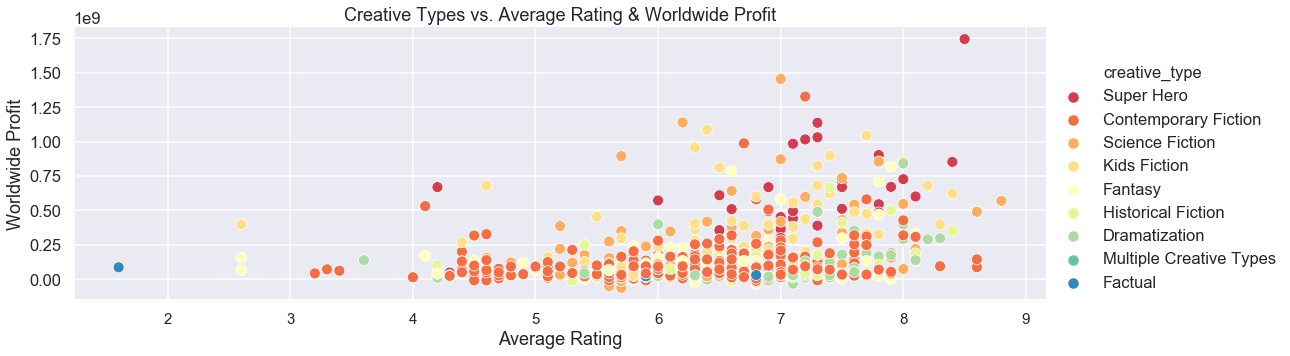

In [110]:
#plot all 'creative_type' with respect to 'rating' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'average_rating', 
           y = 'worldwide_profit',
            hue = 'creative_type',
           data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#set labels
plt.title('Creative Types vs. Average Rating & Worldwide Profit')
plt.xlabel('Average Rating')
plt.ylabel('Worldwide Profit')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [111]:
#save
plt.savefig('creative_type_rating_profit_relplot')

<Figure size 432x288 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

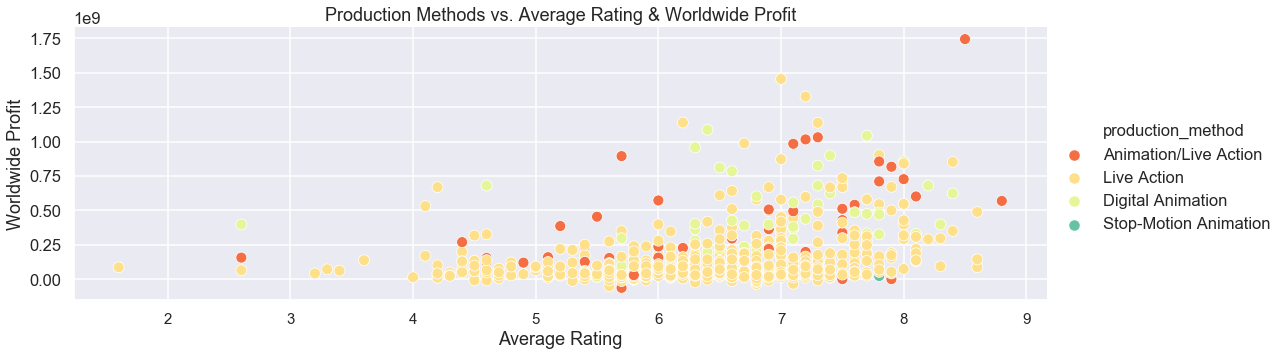

In [112]:
#plot all 'production_method' with respect to 'rating' and 'worldwide_gross'
plt.figure(figsize = (15, 15))
sns.relplot(x = 'average_rating', 
           y = 'worldwide_profit',
            hue = 'production_method',
           data = full_df,
            s = 120, aspect = 3, palette = 'Spectral')

#set labels
plt.title('Production Methods vs. Average Rating & Worldwide Profit')
plt.xlabel('Average Rating')
plt.ylabel('Worldwide Profit')

#set xticks
plt.xticks(fontsize = 15)

#show
plt.show()

In [113]:
#save
plt.savefig('production_method_rating_profit_relplot')

<Figure size 432x288 with 0 Axes>